In [39]:
import os
import jsonlines
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
OBJECTIVE = 'scores'

In [41]:
exp_res = {}

for experiment in os.listdir('models'):
    fpath = os.path.join('models', experiment, 'metrics.json')

    with jsonlines.open(fpath, 'r') as reader:
        metrics = [line for line in reader]
        metrics = pd.DataFrame(metrics)
    
    exp_res[experiment] = metrics

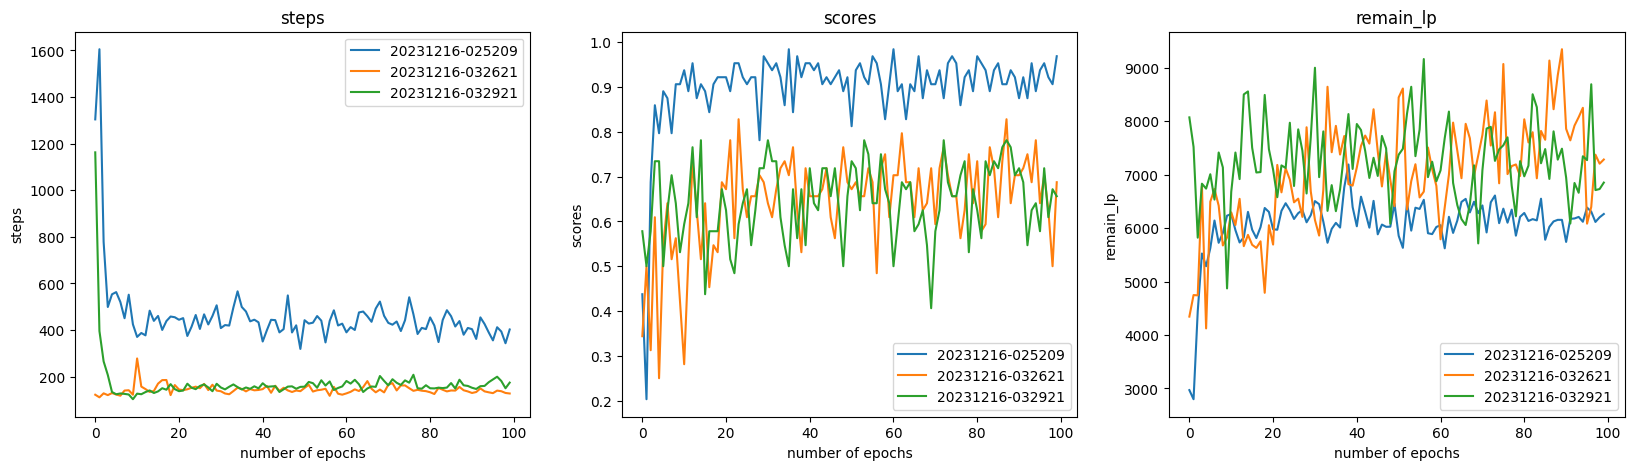

In [42]:
num_of_metrics = metrics.shape[1]

fig, axs = plt.subplots( 1, num_of_metrics)
fig.set_size_inches(20, 5)

# set titles
for i, title in enumerate(metrics.keys()):
    axs[i].set(title=title, xlabel='number of epochs', ylabel=title)

# plot the experiments for different metrics
for name, metrics in exp_res.items():
    for i, key in enumerate(metrics.keys()):
        x = [ i for i in range(len(metrics[key])) ]
        axs[i].plot( x, metrics[key], label=name)
        axs[i].legend()

plt.show()